In [1]:
import torch
from d2l.torch import *

In [17]:
fair_probs = torch.ones([6])/6
counts = torch.distributions.Multinomial(1000,fair_probs).sample()
counts / 1000

tensor([0.1630, 0.1730, 0.1960, 0.1530, 0.1650, 0.1500])

In [35]:
counts = torch.distributions.Multinomial(10,fair_probs).sample((500,))
#print(counts.shape)
#print(counts.cumsum(dim=0))
cum_counts = counts.cumsum(dim=0)
#print(cum_counts)
estimates = cum_counts/cum_counts.sum(dim=1,keepdim=True)
estimates

tensor([[0.0000, 0.3000, 0.2000, 0.2000, 0.2000, 0.1000],
        [0.1000, 0.3500, 0.2000, 0.1000, 0.1500, 0.1000],
        [0.1333, 0.2667, 0.2000, 0.1333, 0.1333, 0.1333],
        ...,
        [0.1618, 0.1683, 0.1713, 0.1707, 0.1647, 0.1633],
        [0.1621, 0.1683, 0.1709, 0.1705, 0.1643, 0.1637],
        [0.1622, 0.1682, 0.1710, 0.1702, 0.1646, 0.1638]])

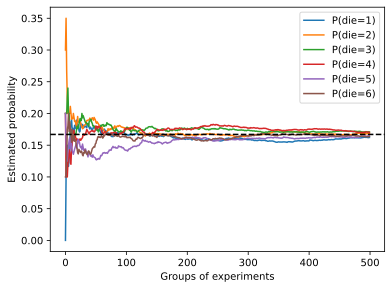

In [52]:
# 绘制图像
set_figsize((6,4.5))
for i in range(6):
    plt.plot(estimates[:,i].numpy(),label=("P(die="+str(i+1)+")"))
#help(plt.plot)
plt.axhline(y=0.167,color = "black",linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend()

In [59]:
torch.tensor??

Docstring:
tensor(data, *, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor

Constructs a tensor with no autograd history (also known as a "leaf tensor", see :doc:`/notes/autograd`) by copying :attr:`data`.

.. warning::

    When working with tensors prefer using :func:`torch.Tensor.clone`,
    :func:`torch.Tensor.detach`, and :func:`torch.Tensor.requires_grad_` for
    readability. Letting `t` be a tensor, ``torch.tensor(t)`` is equivalent to
    ``t.clone().detach()``, and ``torch.tensor(t, requires_grad=True)``
    is equivalent to ``t.clone().detach().requires_grad_(True)``.

.. seealso::

    :func:`torch.as_tensor` preserves autograd history and avoids copies where possible.
    :func:`torch.from_numpy` creates a tensor that shares storage with a NumPy array.

Args:
    data (array_like): Initial data for the tensor. Can be a list, tuple,
        NumPy ``ndarray``, scalar, and other types.

Keyword args:
    dtype (:class:`torch.dtype`, optional): the de